<a href="https://colab.research.google.com/github/Aritro30/Image-Filtering-and-Hybrid-Images/blob/main/CPSC425Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2 Number - 1**

In [ ]:
#Number 1 Code
# import the packages we need for this assignment
from PIL import Image
import numpy as np
from IPython.display import Image  
# define the function boxfilter which takes in n as parameter
def boxfilter(n):
  try:
    #if the condition for n to be odd is not satisfied, the execution jumps to the except block and prints the message
    assert n%2!=0, "AssertionError: Dimension must be odd"
    #if condition is satisfied, the next lines are executed. Array of size n X n is created with a value of 1 initially in each cell
    #Appropriate normalization is done so that each cell value sums up to 1. 
    array = np.full((n,n),1/(n*n))
    #return the created array
    return array
  except AssertionError as msg:  
    print(msg)   
    

In [ ]:
#Script
boxfilter(5)


array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [ ]:
boxfilter(4)


AssertionError: Dimension must be odd


In [ ]:
boxfilter(3)


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

**Part 2 Number - 2**

In [ ]:
#Number 2 Code
import numpy as np
import math
# define the function gauss1d which takes sigma as parameter input
def gauss1d(sigma):
  #define variable len. It is calculated by multiplying sigma with 6 and taking the ceiling value
  #this is done to ensure that length of array is 6 times sigma rounded up to the next odd integer 
  len = np.ceil(6*sigma)
  #if the length is even, we take the next odd value
  #else we take the odd value that is generated
  if len % 2 == 0:
    len+=1
  #create half_len variable which is half the the value of len
  half_len = int(len/2)  
  #create array which is a numpy array. Its length will be len. 
  #however, it will store values from -half_len to half_len going through 0
  array = np.arange(-half_len,half_len+1,1)
  #the create array is passed through map_array function 
  #this is done to apply the density function to each cell of the filter. 
  #the returned array is stored in mapped_array  
  mapped_array = map_array(array,sigma) 
  #dividing the returned array with constant factor to satisfy original formula. Not mandatory.
  mapped_array = mapped_array/(math.sqrt(2*math.pi*sigma*sigma)) 
  #normalizing
  sum = np.sum(mapped_array)
  mapped_array=mapped_array/sum
  return mapped_array
# define the function map_array which takes 2 parameters x(numpy array) and sigma.
def map_array(x,sigma):
  #each value in x array is negatively squared
  x =-np.square(x)
  #each value in x array is divided by squared sigma. 
  #then the exponential of the result is calculated.
  x = np.exp(x/(2*sigma*sigma))
  #the modified array is returned
  return x
   

In [ ]:
#Script
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [ ]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [ ]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [ ]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

**Part 2 Number - 3**

In [ ]:
#Number 3 Code
#import required packages
from scipy import signal
import math
import numpy as np
# define the function gauss2d
def gauss2d(sigma):
  #showing each step of gauss1d initially. Could have used the function in number 2
  #define variable len. It is calculated by multiplying sigma with 6 and taking the ceiling value
  #this is done to ensure that length of array is 6 times sigma rounded up to the next odd integer
  len = np.ceil(6*sigma)
  #if the length is even, we take the next odd value
  #else we take the odd value that is generated
  if len % 2 == 0:
    len+=1
  #create half_len variable which is half the the value of len
  half_len = int(len/2)  
  #create array which is a numpy array. Its length will be len 
  #however, it will store values from -half_len to half_len going through 0
  array = np.arange(-half_len,half_len+1,1)
  #the created array is passed through map_array function to apply the density function to each cell of the filter 
  #the returned array is stored in mapped_array  
  mapped_array = map_array(array,sigma)  
  #mapped array is divided by constant factor. Not mandatory
  mapped_array = mapped_array/((math.sqrt(2*math.pi))*sigma)
  #normalizing the values to sum upto 1
  sum = np.sum(mapped_array)
  mapped_array=mapped_array/sum
  #1D mapped array is converted to two dimensions.
  mapped_array = mapped_array[np.newaxis]
  #transpose of mapped array is computed.
  mapped_array_transpose = mapped_array.transpose()
  #convolution of mapped_array and mapped_array_transpose is done.
  m = signal.convolve2d(mapped_array, mapped_array_transpose,'full')  
  #return the 2D array m
  return m
# define the function map_array
def map_array(x,sigma):
  # each value in x array is negatively squared
  x =-np.square(x)
  # each value in x array is divided by squared sigma. Then the exponential of the result is calculated.
  x = np.exp(x/(2*sigma*sigma))
  # the array is returned
  return x
    

In [ ]:
gauss2d(0.5)


array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [ ]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

**Part 2 Number - 4**

In [ ]:
# Code (4 a)
# import the packages we need
from PIL import Image
import numpy as np
# define the function convolve2d_manual
# it takes in a numpy array and filter as input parameters
def convolve2d_manual(array,filter):
  # rotate the filter 2 times by 90 degrees
  # this ensures rotation of 180 degrees
  # necessary for convolution
  filter = np.rot90(filter,2)
  # filter_rows define the number of rows in the filter
  # filter_columns define the number of columns in the filter
  filter_rows, filter_cols = filter.shape
  # filter_height is half the number of rows
  # filter_width is half the number of columns
  filter_height = filter_rows//2
  filter_width = filter_rows//2
  # create array_output to store the results of convolution
  # array_output is of same size as 'array' which is the input image array
  # array_output is initialized with zeros
  array_output = np.zeros(array.shape)
  # 'array' is padded with zeros. 
  # 'filter_height' number of rows are added as padding on the top and bottom
  # 'filter_width' number of columns are added as padding on the left and right
  array=np.pad(array, (filter_width, filter_height), 'constant')
  #array_rows contain the total number of rows after padding
  #array_cols contain the total number of columns after padding
  array_rows = array.shape[0]
  array_cols = array.shape[1]
  # four nested loops are used to perform the convolution of filter on the image array
  # first outer loop is used for iterating the rows of the image which in 'array'
  # since image is padded with extra rows and columns, i starts from filter_height row
  # ends at array_rows-filter_height column
  for i in range(filter_height,array_rows-filter_height):
    # this loop is used for iterating the columns if 'array' which is the image array
    for j in range(filter_width,array_cols-filter_width):
      # sum contains the convolution result
      # initialized with zero
      sum = 0
      # this loop is used for iterating the rows of the filter
      for m in range(filter_rows):
        # this loop is used for iterating the columns of the filter
        for n in range(filter_cols):
          # convolution result of centre pixel is calculated
          # by multiplying each filter cell value with image pixel and summing them up
          # the result is stored in sum
          sum = sum + ((filter[m][n])*array[i-filter_height+m][j-filter_width+n])
        # next the summation is stored in the centre pixel of output array
        array_output[i-filter_height][j-filter_width] = sum
  # the output array is returned      
  return array_output          

In [ ]:
# Code 4b
# define gaussconvolve2d_manual which takes in the image array in 'array' as parameter and also a value of sigma
def gaussconvolve2d_manual(array,sigma):
  # the 2D gaussian filter is created using gauss2d method
  # the returned filter is stored in filter1
  filter1 = gauss2d(sigma)
  # convolution is done using the convolve2d_manual function created in 'a'
  convolve2d_manual_output = convolve2d_manual(array, filter1)
  # the resultant array is returned
  return convolve2d_manual_output


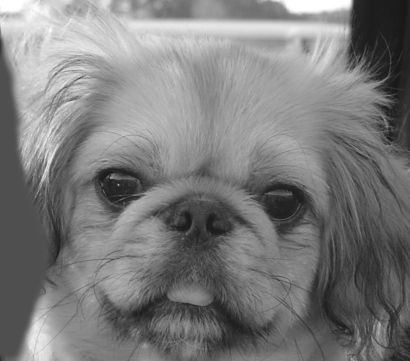

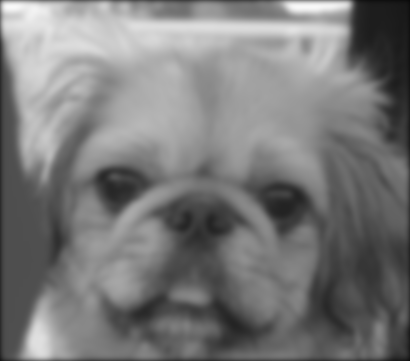

In [ ]:
# Code 4c and 4d
# open the test image
im5 = Image.open('dog.jpg')
# convert the image to a black and white "luminance" greyscale image
im5 = im5.convert('L')
# image is converted to numpy array
im5_array = (np.asarray(im5))
# Note: we need to make a copy to change the values of an array created using
# np.asarray
# image array is converted to double for calculations
im6_array = np.float32(im5_array.copy())
# call gaussconvolve2d_manual with the image array and sigma = 3
im7_array = gaussconvolve2d_manual(im6_array,3)
# the returned array is clamped so that all the values are between 0.0 and 255.0
im7_array = np.clip(im7_array, a_min = 0.0, a_max = 255.0)
# the returned array is converted from double to unsigned integer array for displaying
im7_array = np.uint8(im7_array)
# array is converted into image
im7 = Image.fromarray(im7_array)
# display the original image
display(im5)
print("")
# filtered image is displayed
display(im7)
#save the filtered image
im7.save('new_dog_manual.png','PNG')


**Part 2 Number - 5**

In [ ]:
# Code 5a
# define gaussconvolve2d_scipy which takes 2 parameters as input. Image array in array2 and sigma 
def gaussconvolve2d_scipy(array2,sigma):
  # generate filter using gauss2d function
  filter2 = gauss2d(sigma)
  # return the array that is generated after convolution of filter and image array
  return (signal.convolve2d(array2,filter2,'same'))

**Question** - Why does Scipy have separate functions ‘signal.convolve2d’ and ‘signal.correlate2d’? HINT: Think of a situation in which ‘signal.convolve2d’ and ‘signal.correlate2d’ (with identical arguments) produce different results.

**Answer** - signal.convolve2d and signal.correlate2d work differently when the filter used is not symmetric. Basically convolution of an image with a filter is same as correlation of the same image with filter rotated 180 degrees. When we use a symmetric filter, rotating the filter 180 degree does not change the arrangement and structure of items in the filter. As a result, correlation and convolution is same for symmetric filters. However, for assymetric filters, this does not stand. 

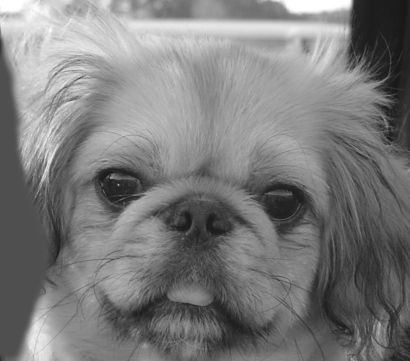

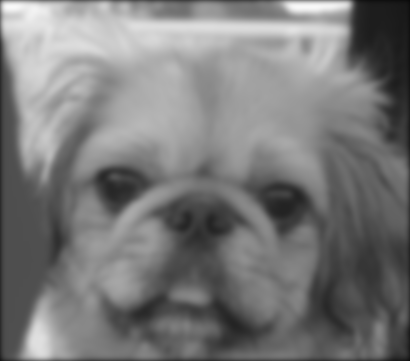

In [ ]:
# Code 5c and 5d
# open the test image
im7 = Image.open('dog.jpg')
# convert the image to a black and white "luminance" greyscale image
im7 = im7.convert('L')
# image is converted to numpy array
im7_array = (np.asarray(im7))
# Note: we need to make a copy to change the values of an array created using
# np.asarray
# image array is converted to double for calculations
im8_array = np.float64(im7_array.copy())
# call gaussconvolve2d_scipy with the image array and sigma = 3
im9_array = gaussconvolve2d_scipy(im8_array,3)
# the returned array is clamped so that all the values are between 0.0 and 255.0
im9_array = np.clip(im9_array, a_min = 0.0, a_max = 255.0)
# the returned array is converted from double to unsigned integer array for displaying
im9_array = np.uint8(im9_array)
# array is converted into image
im9 = Image.fromarray(im9_array)
# display the original image
display(im7)
print()
# display the filtered image
display(im9)
#save the filtered image
im9.save('new_dog_scipy.png','PNG')

**Part 2 Number - 6**

In [ ]:
# import necessary packages
import time
# start timestamp
t1 = time.time() 
# call gaussconvolve2d_scipy with image array created from the dog.jpg image in 5c. Sigma = 10 is also passed
gaussconvolve2d_scipy(im7_array,10) 
# duration in seconds
duration = time.time() - t1 
print(duration)
# start timestamp
t1 = time.time() 
# call gaussconvolve2d_manual with image array created from the dog.jpg image in 5c. Sigma = 10 is also passed
gaussconvolve2d_manual(im7_array,10)
# duration in seconds
duration = time.time() - t1 # duration in seconds
print(duration)

    

1.7439265251159668
590.8777499198914


**Reason for getting a very large duration for the gaussconvolve2d_manual(im7_array,10) function -**

When we call the gaussconvolve2d_manual function, first the gauss2d function is called with a very large sigma value of 10. This function generates the 1D filter of size 6*10+1=61. Each of the cells of the filter is passed over the density function that takes significant amount of time to compute. Moreover, the 1D array is convolved with its transpose 1D array to create the 2D gaussian filter. This covolution involves 61 X 61 multiplications in total. After that, the convolve2d_manual function is called with the image (n X n) and filter (61 X 61). In this function, a total of 4 for loops are used which involves 61 X 61 X n X n multiplications. This computation is very large and inefficient. A much more efficient implementation would have been by first convolving each row of the image with the first 1D filter and then convolving each column with another 1D filter. That would have involved 2 X 61 X n X n multiplications which is much less computation. Moreover, if we could have represented multiplication in terms of equivalent addition operation that would have reduced the duration as well. I am assuming gaussconvolve2d_scipy involves these two modifications to speed up performance. 


**Part 2 Number - 7**

**Question** - Convolution with a 2D Gaussian filter is not the most efficient way to perform Gaussian convolution on an image. In a few sentences, explain how this could be implemented more efficiently taking advantage of separability and why, indeed, this would be faster. NOTE: It is not necessary to implement this. Just the explanation is required. Your answer will be graded for clarity.

**Answer** - If a **m X m** 2D Gaussian filter is separable, it means that it can be represented as an outer product of two 1D filters. What we can do is first convolve each row of the image with the first 1D filter and then convolve each column of the image with another 1D filter. Let's assume that the image is of size **n X n** . When we apply the first filter, it will perform **m X n X n** multiplications. Next, when we apply the second filter, it will take another **m X n X n** multiplications. So total number of multiplications will **2 X m X n X n**. 

On the other hand, if we convolved the image with 2D Gaussian filter, it would have taken **m X m X n X n**  which is significantly larger than **2 X m X n X n**. Hence, the first process is more efficient. 

**Part 3 Number - 1**


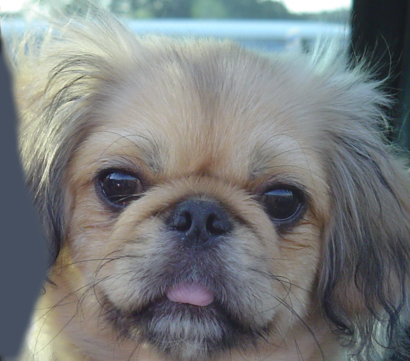

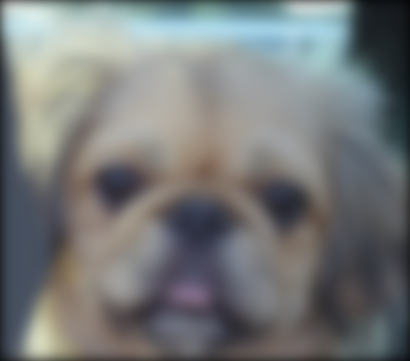

In [ ]:
# define low_pass function which takes a color image as input and a sigma value
# the function's main job is to separate the color channels and apply gaussian filter on each channel
# it then composes the processed channels back to the color images to display
def low_pass(image, sigma):
  #image converted to numpy array
  image_array = (np.asarray(image))
  # Note: we need to make a copy to change the values of an array created using
  # np.asarray
  # image array is converted to double for calculations
  image_array = np.float64(image_array.copy())
  #image_array separated to its color channels r1,g1 and b1
  b1, g1, r1    = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2] # For RGB image
  #gaussian convolution is applied on b1 color channel with approriate sigma
  b1 = gaussconvolve2d_scipy(b1,sigma)
  #gaussian convolution is applied on g1 color channel with approriate sigma
  g1 = gaussconvolve2d_scipy(g1,sigma)
  #gaussian convolution is applied on r1 color channel with approriate sigma
  r1 = gaussconvolve2d_scipy(r1,sigma)
  #clamping is done to ensure values are between 0 and 255
  image0_array = np.clip(b1, a_min = 0.0, a_max = 255.0)
  #double array is converted to unsigned integer array
  image0_array = np.uint8(image0_array)
  #array is converted to image
  image0 = Image.fromarray(image0_array)
  #clamping is done to ensure values are between 0 and 255
  image1_array = np.clip(g1, a_min = 0.0, a_max = 255.0)
  #double array is converted to unsigned integer array
  image1_array = np.uint8(image1_array)
  #array is converted to image
  image1 = Image.fromarray(image1_array)
  #clamping is done to ensure values are between 0 and 255
  image2_array = np.clip(r1, a_min = 0.0, a_max = 255.0)
  #double array is converted to unsigned integer array
  image2_array = np.uint8(image2_array)
  #array is converted to image
  image2 = Image.fromarray(image2_array)
  #images of the separate color channels are merged to form the color image
  merged1=Image.merge("RGB",(image0,image1,image2))
  #return filtered blue, green and red array.
  #merged image is also returned
  return b1,g1,r1,merged1
  

#sample image is opened
image = Image.open('0b_dog.bmp')
#the image is displayed
display(image)
print()
#call low_pass function with the image and sigma = 7
b1,g1,r1,merged1 = low_pass(image,7)
#display the returned filtered image
display(merged1)  


**Part 3 Number - 2**


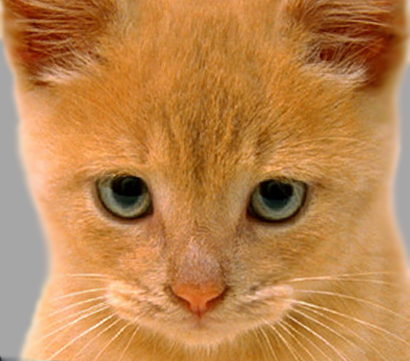

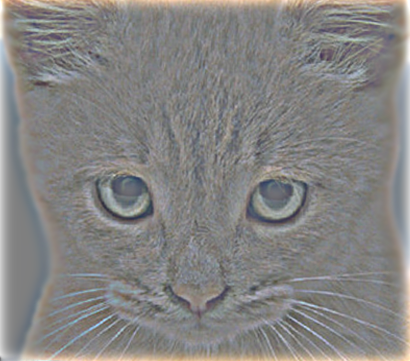

In [ ]:
# define high_pass function which takes a color image as input and a sigma value
# the function's main job is to create high frequency version of the image
def high_pass(image3, sigma):
  #image converted to numpy array
  image3_array = (np.asarray(image3))
  # Note: we need to make a copy to change the values of an array created using
  # np.asarray
  # image array is converted to double for calculations
  image4_array = np.float64(image3_array.copy())
  #image_array separated to its color channels r2,g2 and b2
  b2, g2, r2    = image4_array[:, :, 0], image4_array[:, :, 1], image4_array[:, :, 2] # For RGB image
  #gaussian convolution is applied on b2 color channel with approriate sigma
  #this is subtracted from original b2 color channel
  #128 is added for visualization
  b2 = b2 - gaussconvolve2d_scipy(b2,sigma) + 128
  #gaussian convolution is applied on g2 color channel with approriate sigma
  #this is subtracted from original g2 color channel
  #128 is added for visualization
  g2 = g2 - gaussconvolve2d_scipy(g2,sigma) + 128
  #gaussian convolution is applied on r2 color channel with approriate sigma
  #this is subtracted from original r2 color channel
  #128 is added for visualization
  r2 = r2 - gaussconvolve2d_scipy(r2,sigma) + 128
  #clamping is done to ensure values are between 0 and 255
  image5_array = np.clip(b2, a_min = 0.0, a_max = 255.0)
  #double array is converted to unsigned integer array
  image5_array = np.uint8(image5_array)
  #array is converted to image
  image5 = Image.fromarray(image5_array)
  #clamping is done to ensure values are between 0 and 255
  image6_array = np.clip(g2, a_min = 0.0, a_max = 255.0)
  #double array is converted to unsigned integer array
  image6_array = np.uint8(image6_array)
  #array is converted to image
  image6 = Image.fromarray(image6_array)
  #clamping is done to ensure values are between 0 and 255
  image7_array = np.clip(r2, a_min = 0.0, a_max = 255.0)
  #double array is converted to unsigned integer array
  image7_array = np.uint8(image7_array)
  #array is converted to image
  image7 = Image.fromarray(image7_array)
  #images of the separate color channels are merged to form the color image
  merged2=Image.merge("RGB",(image5,image6,image7))
  #return filtered blue b2, green g2 and red r2 array.
  #merged image is also returned
  return b2,g2,r2,merged2
  
#sample image is opened
image3 = Image.open('0a_cat.bmp')
#the image is displayed
display(image3)
print()
#call high_pass function with the image and sigma = 7
b2,g2,r2,merged2 = high_pass(image3,7)
#display the returned filtered image
display(merged2)  

**Part 3 Number - 3**


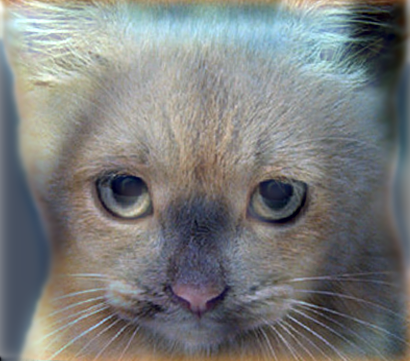

In [ ]:
#define the combine function that takes in 2 images and a value of sigma to produce a hybrid image.
def combine(img1,img2,sigma):
  #call low_pass function with the first image and sigma = 7
  #returns first image with only low frequency
  #each color channel array after the filtering is also returned
  b1,g1,r1,merged1 = low_pass(img1,sigma)
  #call high_pass function with the second image and sigma = 7
  #returns second image with only high frequency
  #each color channel array after the filtering is also returned
  b2,g2,r2,merged2 = high_pass(img2,sigma)
  #pixel value of blue color channel of the 2 images are summed up
  #in the low_pass function we added 128 once for displaying
  #in the high_pass function we added 128 another time for displaying
  #as a result, we have to subtract 128 two times while finding the sum
  #we add 128 to display the hybrid image
  combined_b = b1 + b2 - 128 - 128 + 128
  #pixel value of green color channel of the 2 images are summed up 
  #in the low_pass function we added 128 once for displaying
  #in the high_pass function we added 128 another time for displaying
  #as a result, we have to subtract 128 two times while finding the sum
  #we add 128 to display the hybrid image
  combined_g = g1 + g2 - 128 - 128 + 128
  #pixel value of red color channel of the 2 images are summed up
  #in the low_pass function we added 128 once for displaying
  #in the high_pass function we added 128 another time for displaying
  #as a result, we have to subtract 128 two times while finding the sum
  #we add 128 to display the hybrid image
  combined_r = r1 + r2 - 128 - 128 + 128
  #clamping is done to ensure values are between 0 and 255
  image8_array = np.clip(combined_b, a_min = 0.0, a_max = 255.0)
  #double array is converted to unsigned integer array
  image8_array = np.uint8(image8_array)
  #array is converted to image
  image8 = Image.fromarray(image8_array)
  #clamping is done to ensure values are between 0 and 255
  image9_array = np.clip(combined_g, a_min = 0.0, a_max = 255.0)
  #double array is converted to unsigned integer array
  image9_array = np.uint8(image9_array)
  #array is converted to image
  image9 = Image.fromarray(image9_array)
  #clamping is done to ensure values are between 0 and 255
  image10_array = np.clip(combined_r, a_min = 0.0, a_max = 255.0)
  #double array is converted to unsigned integer array
  image10_array = np.uint8(image10_array)
  #array is converted to image
  image10 = Image.fromarray(image10_array)
  #all the color channels are merged into the colored image
  merged3=Image.merge("RGB",(image8,image9,image10))
  #display the composed image
  display(merged3)
#open sample images  
img1 = Image.open('0b_dog.bmp')
img2 = Image.open('0a_cat.bmp')
#call combine function with the images and sigma = 7
combine(img1,img2,7)

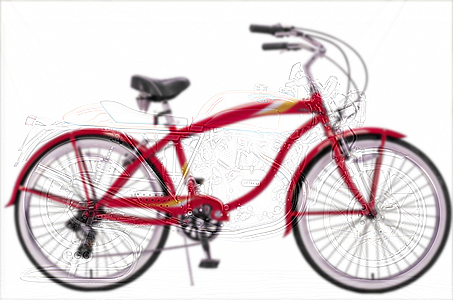

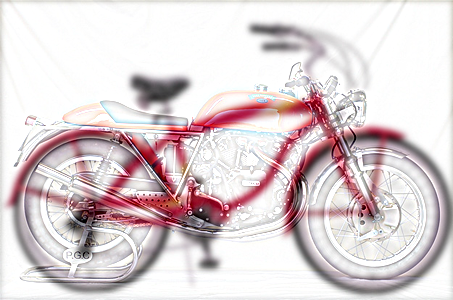

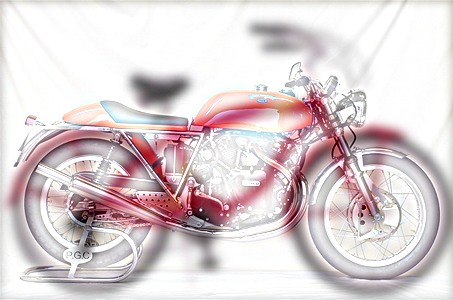

In [ ]:
#test1
#open the sample images
img1 = Image.open('1a_bicycle.bmp')
img2 = Image.open('1b_motorcycle.bmp')
#call combine function with the images and sigma = 1
combine(img1,img2,1)
#call combine function with the images and sigma = 3
combine(img1,img2,3)
#call combine function with the images and sigma = 5
combine(img1,img2,5)





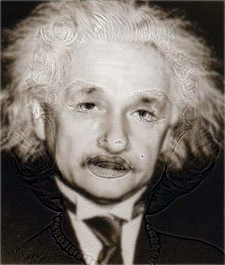

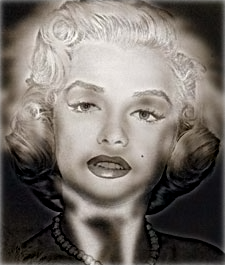

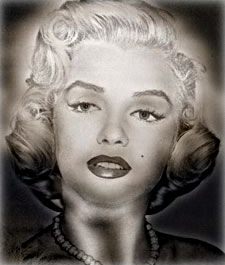

In [ ]:
#test2
#open the sample images
img1 = Image.open('2a_einstein.bmp')
img2 = Image.open('2b_marilyn.bmp')
#call combine function with the images and sigma = 1
combine(img1,img2,1)
#call combine function with the images and sigma = 3
combine(img1,img2,3)
#call combine function with the images and sigma = 5
combine(img1,img2,5)


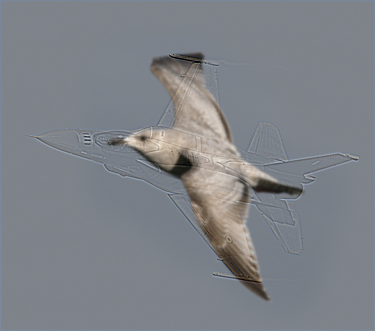

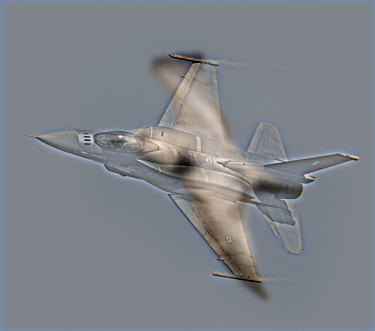

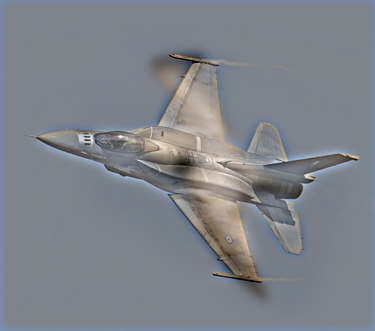

In [ ]:
#test3
img1 = Image.open('4a_bird.bmp')
img2 = Image.open('4b_plane.bmp')
#call combine function with the images and sigma = 1
combine(img1,img2,1)
#call combine function with the images and sigma = 3
combine(img1,img2,3)
#call combine function with the images and sigma = 5
combine(img1,img2,5)


**Part 4 Number - 1**


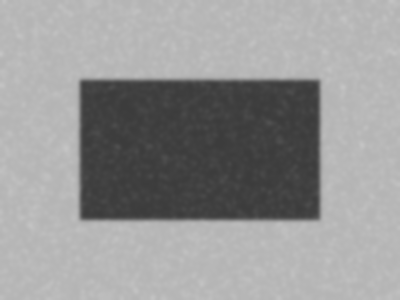

In [ ]:
#import necessary packages
from PIL import Image
import cv2
#open the image
src = Image.open('box_gauss.png')
#kernel size 13 X 13
ksize=(13, 13)
#sigma value = 2
#kernel size is 6 times 2 rounded upto next odd integer
output=cv2.GaussianBlur(np.float32(src),ksize,sigmaX = 2,sigmaY= 2)
#clamping is done to ensure values are between 0 and 255
output = np.clip(output, a_min = 0.0, a_max = 255.0)  
#double array converted to unsigned integer array
output = output.astype('uint8')
#array converted to image
im7 = Image.fromarray(output)
#display the image
display(im7)





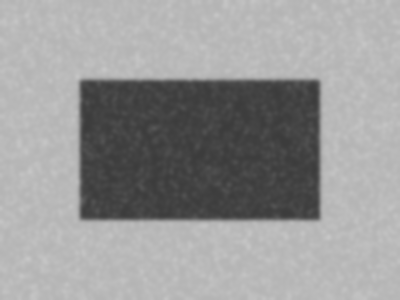

In [ ]:
#import necessary packages
from PIL import Image
import cv2
#open the image
src = Image.open('box_speckle.png')
#kernel size 13 X 13
ksize=(13, 13)
#sigma value = 2
#kernel size is 6 times 2 rounded upto next odd integer
output=cv2.GaussianBlur(np.float32(src),ksize,sigmaX = 2,sigmaY = 2)
#clamping is done to ensure values are between 0 and 255
output = np.clip(output, a_min = 0.0, a_max = 255.0)  
#double array converted to unsigned integer array
output = output.astype('uint8')
#array converted to image
im7 = Image.fromarray(output)
#display the image
display(im7)


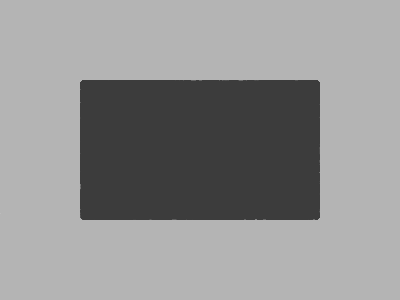

In [ ]:
#open the sample image
src = Image.open('box_gauss.png')
#kernel size of 5 is selected
#median blur is applied on src
output=cv2.medianBlur(np.uint8(src),ksize=5)
#clamping is done to ensure values are between 0 and 255
output = np.clip(output, a_min = 0.0, a_max = 255.0)  
#double array converted to unsigned integer for displaying
output = output.astype('uint8')
#array converted to image
im7 = Image.fromarray(output)
#display the image
display(im7)


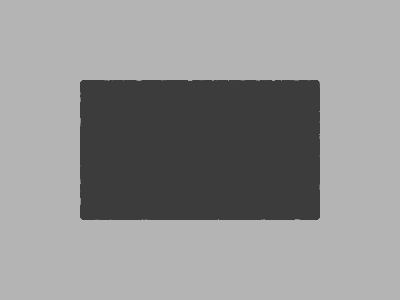

In [ ]:
#open the sample image
src = Image.open('box_speckle.png')
#kernel size of 3 is selected
#median blur is applied on src
output=cv2.medianBlur(np.uint8(src),ksize=5)
#clamping is done to ensure values are between 0 and 255
output = np.clip(output, a_min = 0.0, a_max = 255.0)  
#double array converted to unsigned integer for displaying
output = output.astype('uint8')
#array converted to image
im7 = Image.fromarray(output)
#display the image
display(im7)


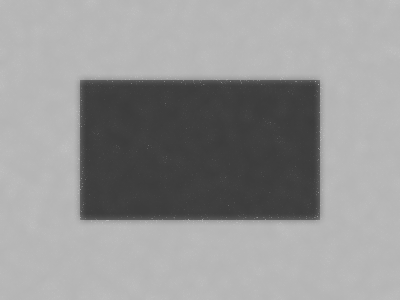

In [ ]:
#open the sample image
src = Image.open('box_gauss.png')
#apply bilateral filter on the image with filter size = 15, sigmaColor = sigmaSpace = 85
output=cv2.bilateralFilter(np.float32(src), 15, 85, 85)
#double array converted to unsigned integer
output = output.astype('uint8')
#array converted to image
im7 = Image.fromarray(output)
#display the image
display(im7)


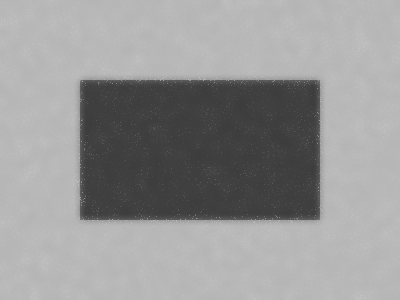

In [ ]:
#open the sample image
src = Image.open('box_speckle.png')
#apply bilateral filter on the image with filter size = 15, sigmaColor = sigmaSpace = 85
output=cv2.bilateralFilter(np.float32(src), 15, 85, 85)
#double array converted to unsigned integer
output = output.astype('uint8')
#array converted to image
im7 = Image.fromarray(output)
#display the image
display(im7)


**Part 4 Number - 2**

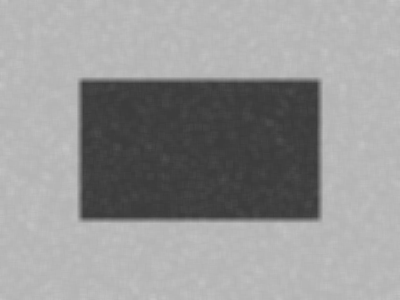

-------------------------------------------------------------------------


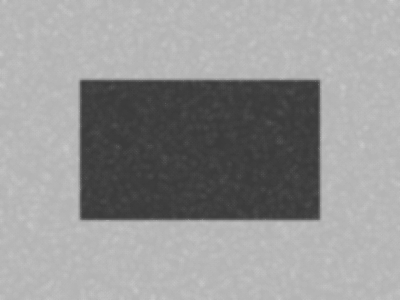

-------------------------------------------------------------------------


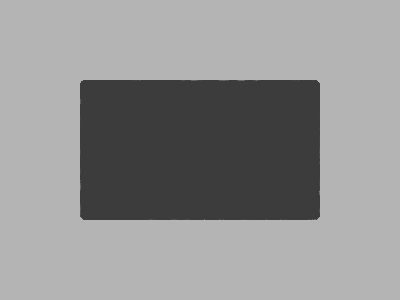

In [ ]:
import cv2
#open sample image
src = Image.open('box_gauss.png')
#apply gaussian blur with kernel size = 7 X 7 and sigma = 50
output1 = cv2.GaussianBlur(np.float32(src), ksize=(7, 7), sigmaX=50)
#convert double array into unsigned integer
output1 = output1.astype('uint8')
#convert from array to image
im7 = Image.fromarray(output1)
#display the image
display(im7)
print("-------------------------------------------------------------------------")
#apply bilateral filter with filter size = 7  and sigmaColor = sigmaSpace = 150
output2 = cv2.bilateralFilter(np.float32(src), 7, sigmaColor = 150, sigmaSpace = 150)
#convert double array into unsigned integer
output2 = output2.astype('uint8')
#convert from array to image
im7 = Image.fromarray(output2)
#display the image
display(im7)
print("-------------------------------------------------------------------------")
#apply median blur with kernel size = 7
output3=cv2.medianBlur(np.uint8(src),ksize = 7)
#convert double array into unsigned integer
output3 = output3.astype('uint8')
#convert from array to image
im7 = Image.fromarray(output3)
#display the image
display(im7)



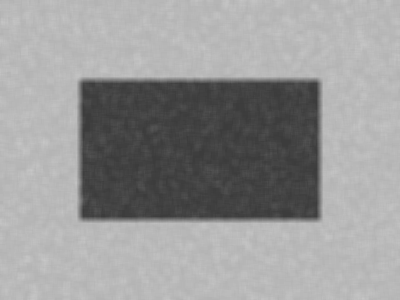

-------------------------------------------------------------------------


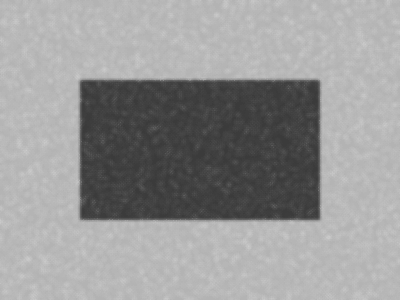

-------------------------------------------------------------------------


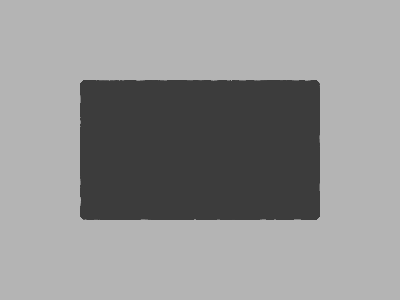

In [ ]:
import cv2
#open sample image
src = Image.open('box_speckle.png')
#apply gaussian blur with kernel size = 7 X 7 and sigma = 50
output4 = cv2.GaussianBlur(np.float32(src), ksize=(7, 7), sigmaX=50)
#convert double array into unsigned integer
output4 = output4.astype('uint8')
#convert from array to image
im7 = Image.fromarray(output4)
#display the image
display(im7)
print("-------------------------------------------------------------------------")
#apply bilateral filter with filter size = 7  and sigmaColor = sigmaSpace = 150
output5 = cv2.bilateralFilter(np.float32(src), 7, sigmaColor = 150, sigmaSpace = 150)
#convert double array into unsigned integer
output5 = output5.astype('uint8')
#convert from array to image
im7 = Image.fromarray(output5)
#display the image
display(im7)
print("-------------------------------------------------------------------------")
#apply median blur with kernel size = 7
output6=cv2.medianBlur(np.uint8(src),ksize = 7)
#convert double array into unsigned integer
output6 = output6.astype('uint8')
#convert from array to image
im7 = Image.fromarray(output6)
#display the image
display(im7)



**Explanation** - According to my observation, median filter works best. This is because the noise here is salt and pepper noise. The noise values are extreme. Since median filter deals with median value and is less sensitive to extreme values or outliers, it completely ignores the noise values and the noises are effectively removed. It works best for both the images. Moreover, the sharp edges are well preserved when we use median filter. However, the only problem that I am observing is the edge corners of the inner rectangle for both the images. They have become a bit roundish.

The result of gaussian filter and bilateral filter is more or less the same. However, in bilateral filter, the sharp edges of the inner rectangle are better preserved. Not preserving sharp edges is one problem of gaussian filter. It also reduces details.

Another important thing to notice is the noise difference in gauss image and speckle image. Initially, without denoising, the noise/granules seemed to be greater and bigger in the speckle image compared to gauss image. As a result, denoising with all the 3 filters worked better in case of the gauss image compared to the speckle image. For example: When we used median blur on gauss image, there were less artifacts in the resultant image. Denoising was near about perfect. However, with the same combination of parameters, a clean and clear boundary was not formed for the inner, black rectangle when we applied median blur on the speckle image.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "./drive/My Drive/Colab Notebooks/CPSC425Assignment1.ipynb" ./


In [ ]:
!jupyter nbconvert --to PDF "CPSC425Assignment1.ipynb"

[NbConvertApp] Converting notebook CPSC425Assignment1.ipynb to PDF
[NbConvertApp] Support files will be in CPSC425Assignment1_files/
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425Assignment1_files
[NbConvertApp] Making directory ./CPSC425